# Unveiling Spatio-Temporal Patterns in Chickenpox Cases: An Analytical Journey with GPT-**4**

In a world swarmed with data, the realms of health and disease management are no exception. The tapestry of healthcare data, woven with threads of temporal patterns and spatial distributions, narrates tales of disease dynamics, unveiling crucial insights into their spread and influence. In our analytical saga today, we embark on a journey through the spatio-temporal landscape of chickenpox cases in Hungary, escorted by the sophisticated capabilities of GPT-4, one of the latest triumphs in artificial intelligence.

GPT-4, with its refined intelligence, dons multiple hats in our exploration— a meticulous examiner, a proficient data sculptor, and a sagacious model maestro. The journey commences with a dive into Exploratory Data Analysis (EDA), where GPT-4 meticulously unfolds the temporal tales of chickenpox, revealing patterns and seasonal rhythms embedded within the data currents.

Guided by precision and clarity, our analytical odyssey navigates through the realms of data cleaning and preprocessing. GPT-4 ensures a sanctified data terrain, purged of inconsistencies and anomalies, laying a solid foundation for the analytical constructs to follow.

In the clustering and anomaly detection phase, GPT-4 unveils clusters of regions weaving similar temporal tales of chickenpox cases, casting light upon the communal rhythms in the data. Anomalies, those intriguing deviations from the ordinary, are also brought into the limelight, unveiling episodes of unusual spikes in the chickenpox saga.

Feature engineering, the art of crafting data attributes, is where GPT-4 showcases its craftsmanship. Navigating through temporal dependencies, new features are forged, enriching the dataset with nuanced perspectives and shades of information, preparing it for the modeling spectacle.

As we sail into the realms of model building and evaluation, GPT-4 orchestrates a symphony of algorithms, ranging from the timeless rhythms of ARIMA to the ensemble harmonies of Random Forest and Gradient Boosting. A simulated AutoML concerto unfolds, where models are meticulously tuned and evaluated, resonating with the melodies of accuracy and performance.

Join us in this analytical odyssey, as we, accompanied by the prowess of GPT-4, traverse through the spatio-temporal territories of chickenpox cases, exploring patterns, unraveling anomalies, and unveiling insights, all woven into the fabric of our data-driven narrative.



Let's start the Exploratory Data Analysis (EDA) by loading the datasets and taking a look at the first few rows of each. We'll also summarize the datasets to understand their structures, types of data, and any initial patterns or anomalies that might be visible.

In [1]:
import pandas as pd

# Load the datasets
chickenpox_data = pd.read_csv('/content/hungary_chickenpox.csv')
county_edges_data = pd.read_csv('/content/hungary_county_edges.csv')

# Display basic information and the first few rows of each dataset
chickenpox_data_info = chickenpox_data.info()
chickenpox_data_head = chickenpox_data.head()

county_edges_data_info = county_edges_data.info()
county_edges_data_head = county_edges_data.head()

chickenpox_data_head, county_edges_data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      522 non-null    object
 1   BUDAPEST  522 non-null    int64 
 2   BARANYA   522 non-null    int64 
 3   BACS      522 non-null    int64 
 4   BEKES     522 non-null    int64 
 5   BORSOD    522 non-null    int64 
 6   CSONGRAD  522 non-null    int64 
 7   FEJER     522 non-null    int64 
 8   GYOR      522 non-null    int64 
 9   HAJDU     522 non-null    int64 
 10  HEVES     522 non-null    int64 
 11  JASZ      522 non-null    int64 
 12  KOMAROM   522 non-null    int64 
 13  NOGRAD    522 non-null    int64 
 14  PEST      522 non-null    int64 
 15  SOMOGY    522 non-null    int64 
 16  SZABOLCS  522 non-null    int64 
 17  TOLNA     522 non-null    int64 
 18  VAS       522 non-null    int64 
 19  VESZPREM  522 non-null    int64 
 20  ZALA      522 non-null    int64 
dtypes: int64(20), ob

(         Date  BUDAPEST  BARANYA  BACS  BEKES  BORSOD  CSONGRAD  FEJER  GYOR  \
 0  03/01/2005       168       79    30    173     169        42    136   120   
 1  10/01/2005       157       60    30     92     200        53     51    70   
 2  17/01/2005        96       44    31     86      93        30     93    84   
 3  24/01/2005       163       49    43    126      46        39     52   114   
 4  31/01/2005       122       78    53     87     103        34     95   131   
 
    HAJDU  ...  JASZ  KOMAROM  NOGRAD  PEST  SOMOGY  SZABOLCS  TOLNA  VAS  \
 0    162  ...   130       57       2   178      66        64     11   29   
 1     84  ...    80       50      29   141      48        29     58   53   
 2    191  ...    64       46       4   157      33        33     24   18   
 3    107  ...    63       54      14   107      66        50     25   21   
 4    172  ...    61       49      11   124      63        56      7   47   
 
    VESZPREM  ZALA  
 0        87    68  
 1    

Summary of the Datasets
Chickenpox Data
Rows: 522
Columns: 21
Columns Description:
Date: The date the data was collected.
Other columns (e.g., BUDAPEST, BARANYA, BACS, etc.): Number of chickenpox cases in various regions.
Missing Values: No missing values.
County Edges Data
Rows: 102
Columns: 4
Columns Description:
name_1 and name_2: Names of the counties.
id_1 and id_2: Corresponding IDs of the counties.
Missing Values: No missing values.

Next Steps in EDA
Chickenpox Data:

Analyze the distribution of chickenpox cases across various regions.
Analyze the temporal trend of chickenpox cases.
County Edges Data:

Explore the connections between various counties.

1. Chickenpox Data Analysis
Let's start by analyzing the temporal trends in the chickenpox data. We'll visualize:

The total number of chickenpox cases over time.
The number of chickenpox cases in various regions over time.
2. County Edges Data Analysis
For the county edges data, we'll visualize the connections between various counties. This visualization will help us understand the spatial relationships between different regions.

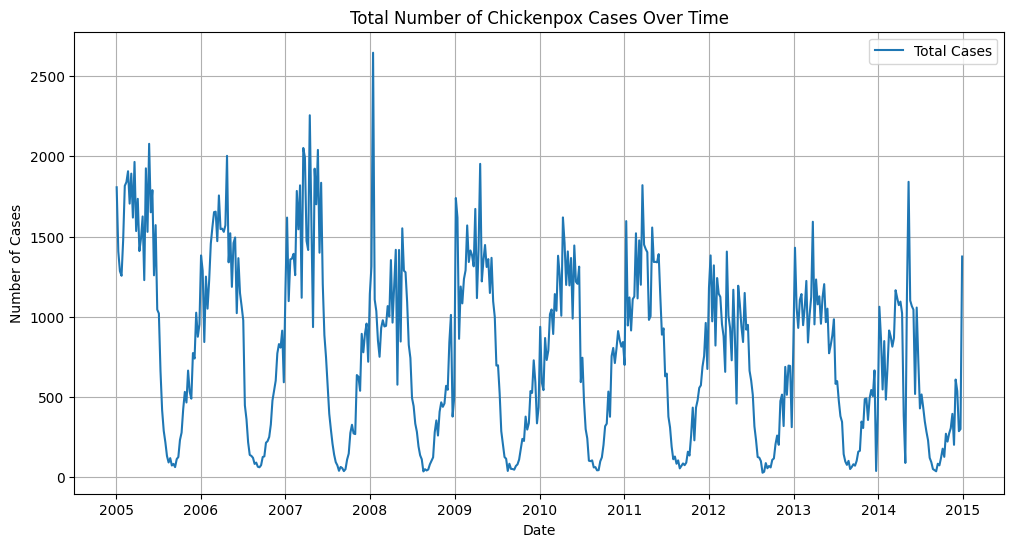

In [2]:
import matplotlib.pyplot as plt

# Convert the "Date" column to datetime format
chickenpox_data['Date'] = pd.to_datetime(chickenpox_data['Date'], format='%d/%m/%Y')

# Set the "Date" column as the index
chickenpox_data.set_index('Date', inplace=True)

# Plot the total number of chickenpox cases over time
plt.figure(figsize=(12, 6))
plt.plot(chickenpox_data.sum(axis=1), label='Total Cases')
plt.title('Total Number of Chickenpox Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()


The plot above shows the total number of chickenpox cases across all regions over time. We observe some seasonality in the data, with peaks and troughs occurring at regular intervals.

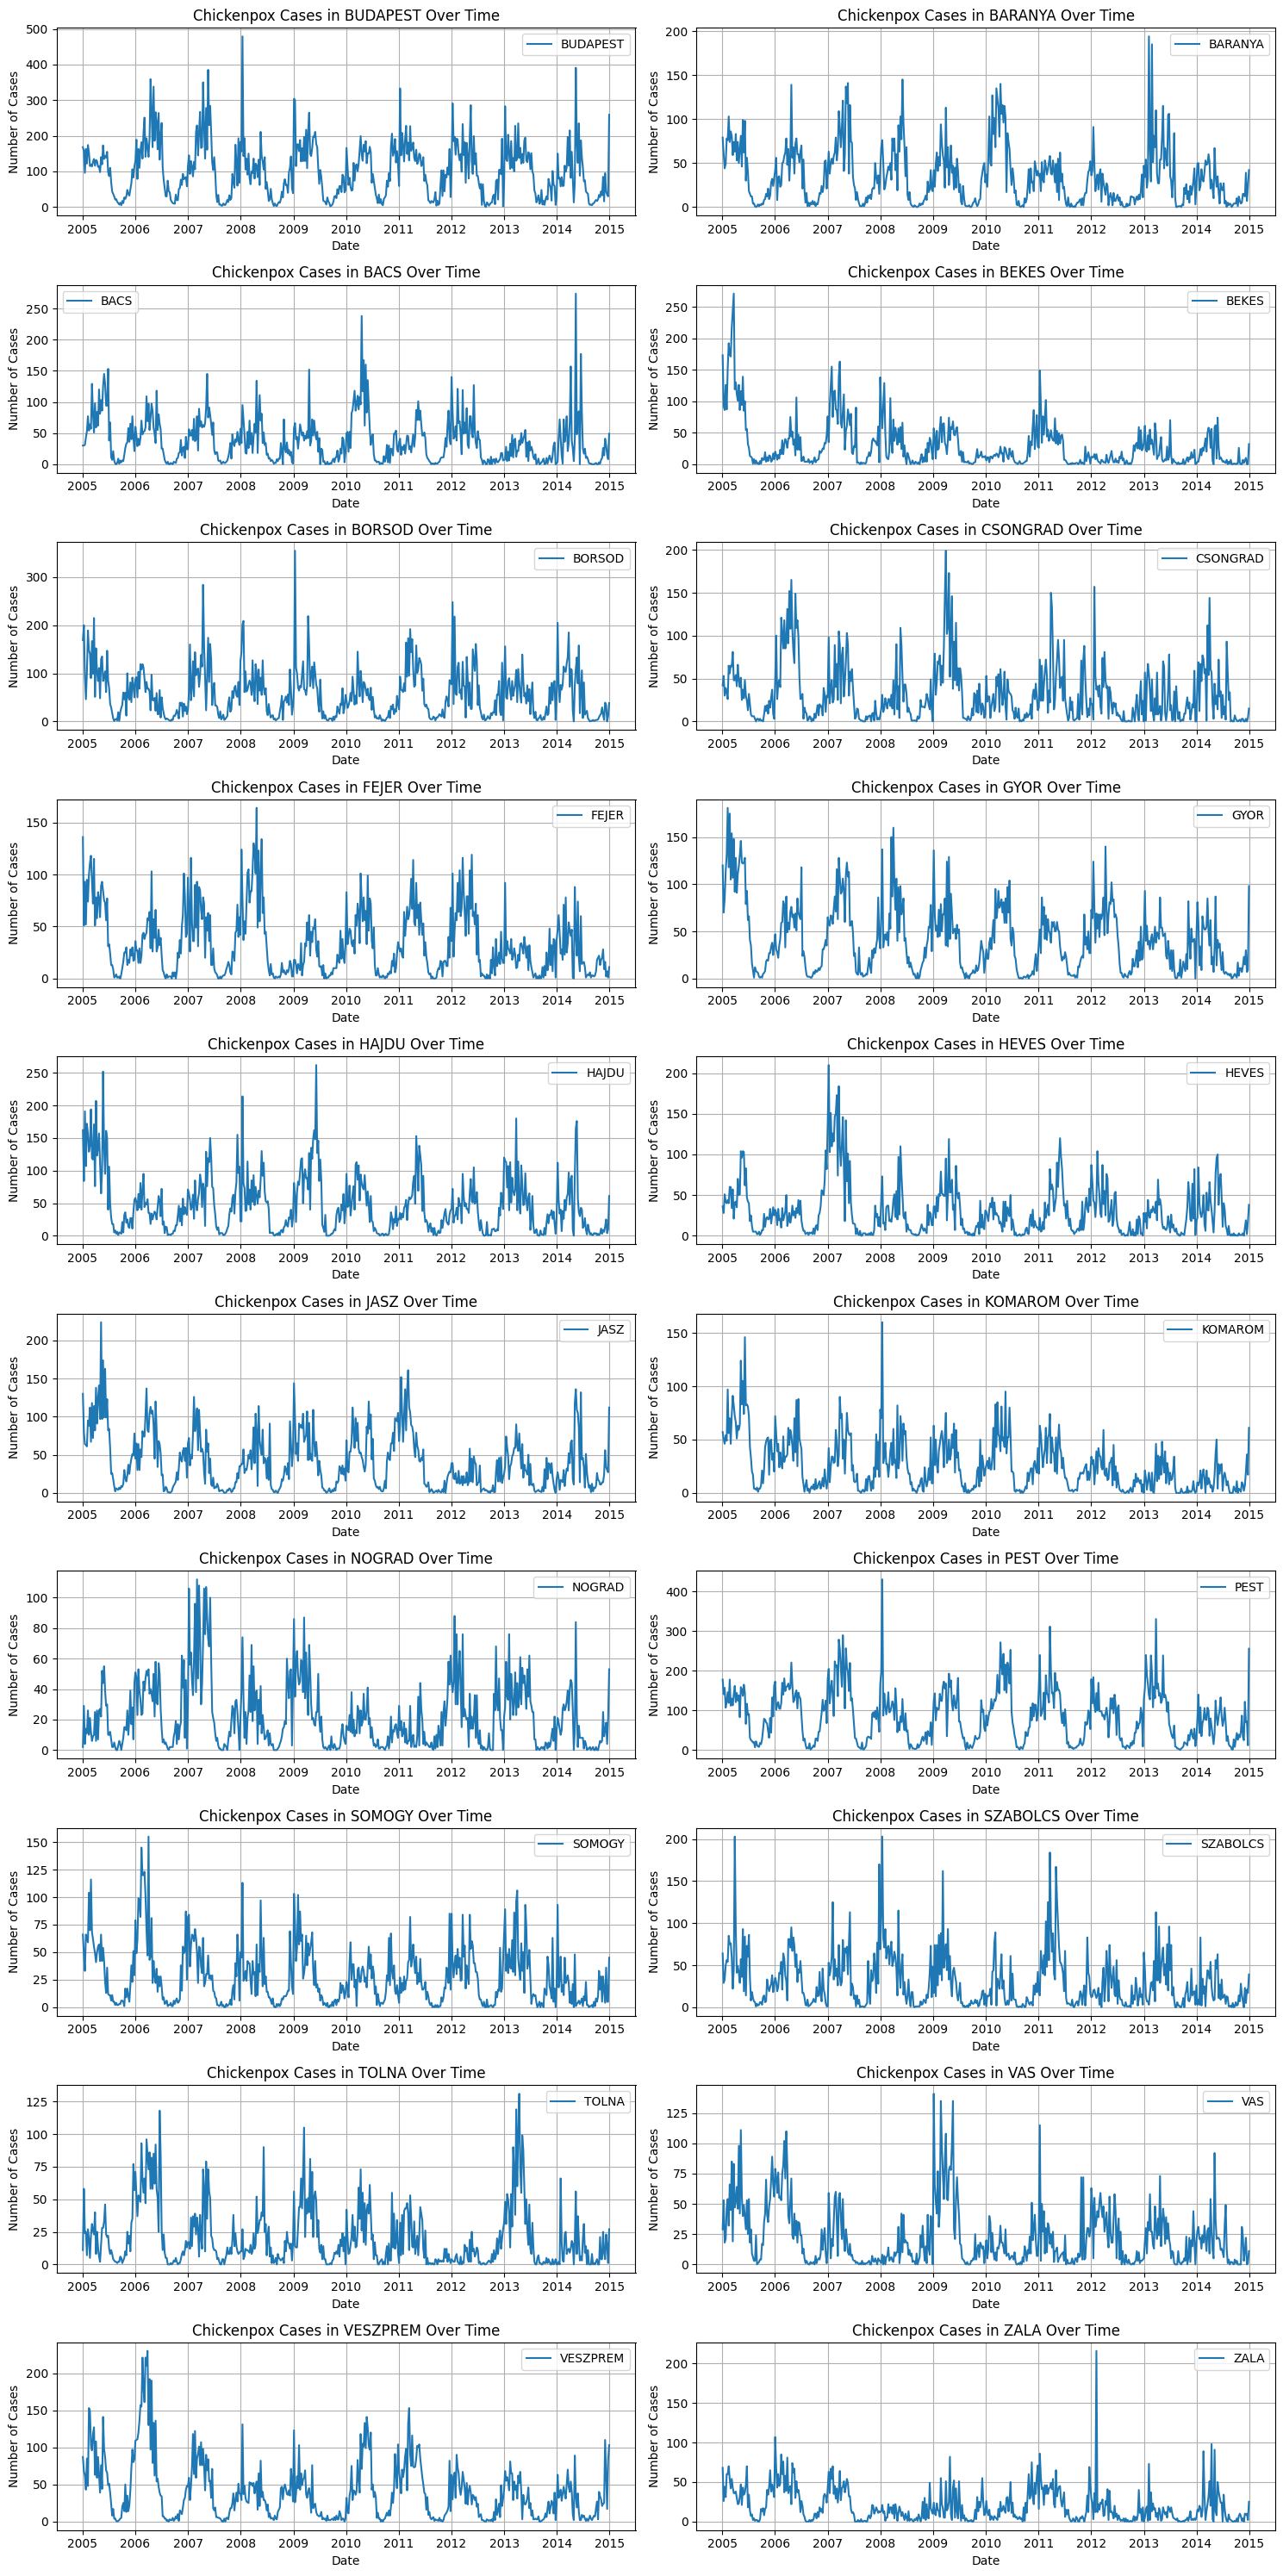

In [3]:
# Plotting the number of chickenpox cases in various regions over time
regions = chickenpox_data.columns

# Creating subplots
fig, axs = plt.subplots(len(regions)//2, 2, figsize=(15, 30))
fig.subplots_adjust(hspace=0.5)

# Looping through each region and creating a plot
for i, region in enumerate(regions):
    row = i // 2
    col = i % 2
    axs[row, col].plot(chickenpox_data.index, chickenpox_data[region], label=region)
    axs[row, col].set_title(f'Chickenpox Cases in {region} Over Time')
    axs[row, col].set_xlabel('Date')
    axs[row, col].set_ylabel('Number of Cases')
    axs[row, col].grid(True)
    axs[row, col].legend()

plt.tight_layout()
plt.show()


The plots above show the number of chickenpox cases in various regions over time. Each subplot represents a different region. From the plots, we can observe:

Seasonal Trends: Similar to the total cases, each region also shows some seasonal trends with regular peaks and troughs.
Variability: Different regions have different levels of variability and number of cases.


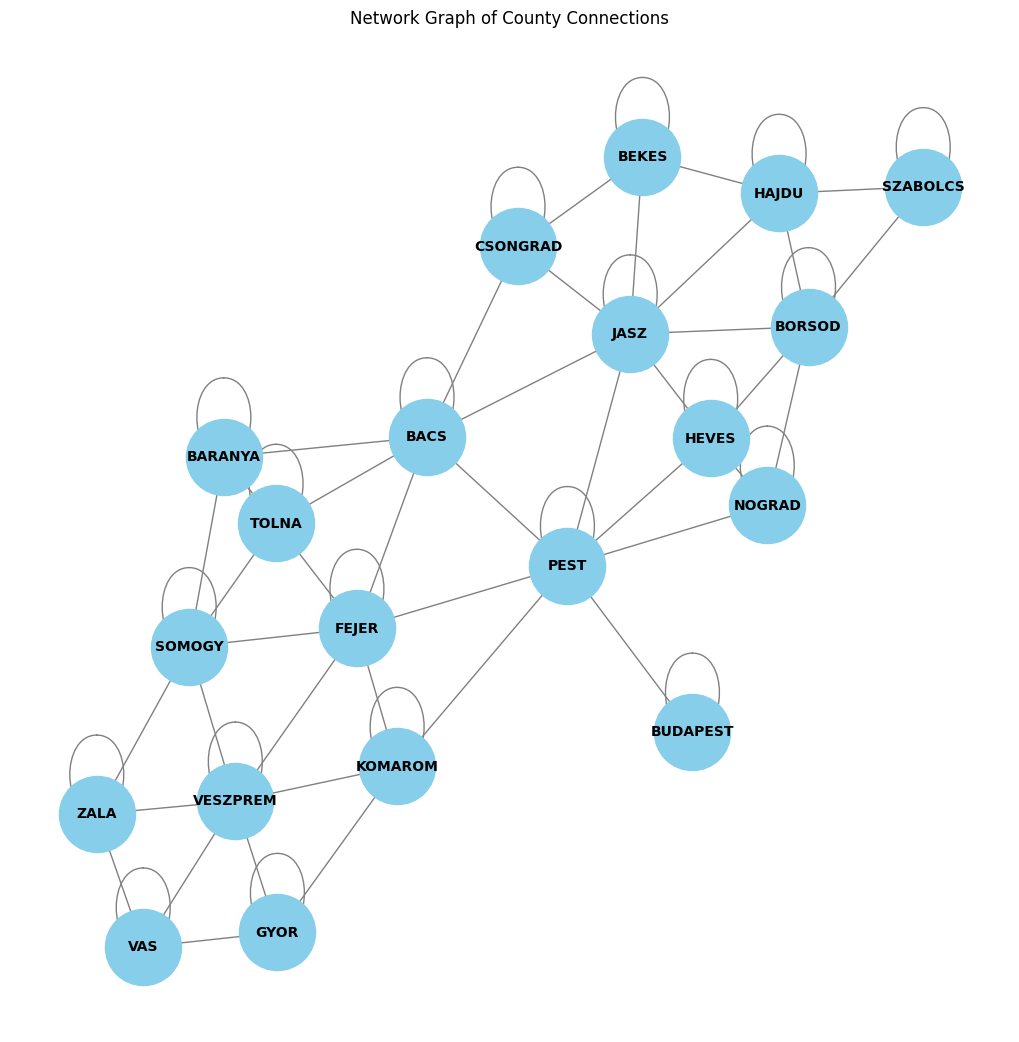

In [4]:
import networkx as nx

# Creating a new graph from the county edges data
G = nx.from_pandas_edgelist(county_edges_data, 'name_1', 'name_2')

# Drawing the graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42)  # Setting the seed for reproducible layout
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=3000, edge_color='gray', font_size=10, font_weight='bold')
plt.title('Network Graph of County Connections')
plt.show()


The network graph above illustrates the connections between different counties in Hungary. Each node represents a county, and each edge signifies a connection between two counties.

Nodes: Counties
Edges: Connections between counties
This visualization provides a spatial perspective, helping us understand how chickenpox might spread between different regions based on their connections.



In the data cleaning and preprocessing step, we will:

Check for Missing Values: Ensure that there are no missing values in the datasets.
Detect Outliers: Identify and handle outliers that might affect the analysis.
Normalize or Standardize Data: If necessary, normalize or standardize the data to bring all variables to a similar scale.

In [5]:
# Checking for missing values in the chickenpox data
missing_values_chickenpox = chickenpox_data.isnull().sum()

# Checking for missing values in the county edges data
missing_values_county_edges = county_edges_data.isnull().sum()

missing_values_chickenpox, missing_values_county_edges


(BUDAPEST    0
 BARANYA     0
 BACS        0
 BEKES       0
 BORSOD      0
 CSONGRAD    0
 FEJER       0
 GYOR        0
 HAJDU       0
 HEVES       0
 JASZ        0
 KOMAROM     0
 NOGRAD      0
 PEST        0
 SOMOGY      0
 SZABOLCS    0
 TOLNA       0
 VAS         0
 VESZPREM    0
 ZALA        0
 dtype: int64,
 name_1    0
 name_2    0
 id_1      0
 id_2      0
 dtype: int64)

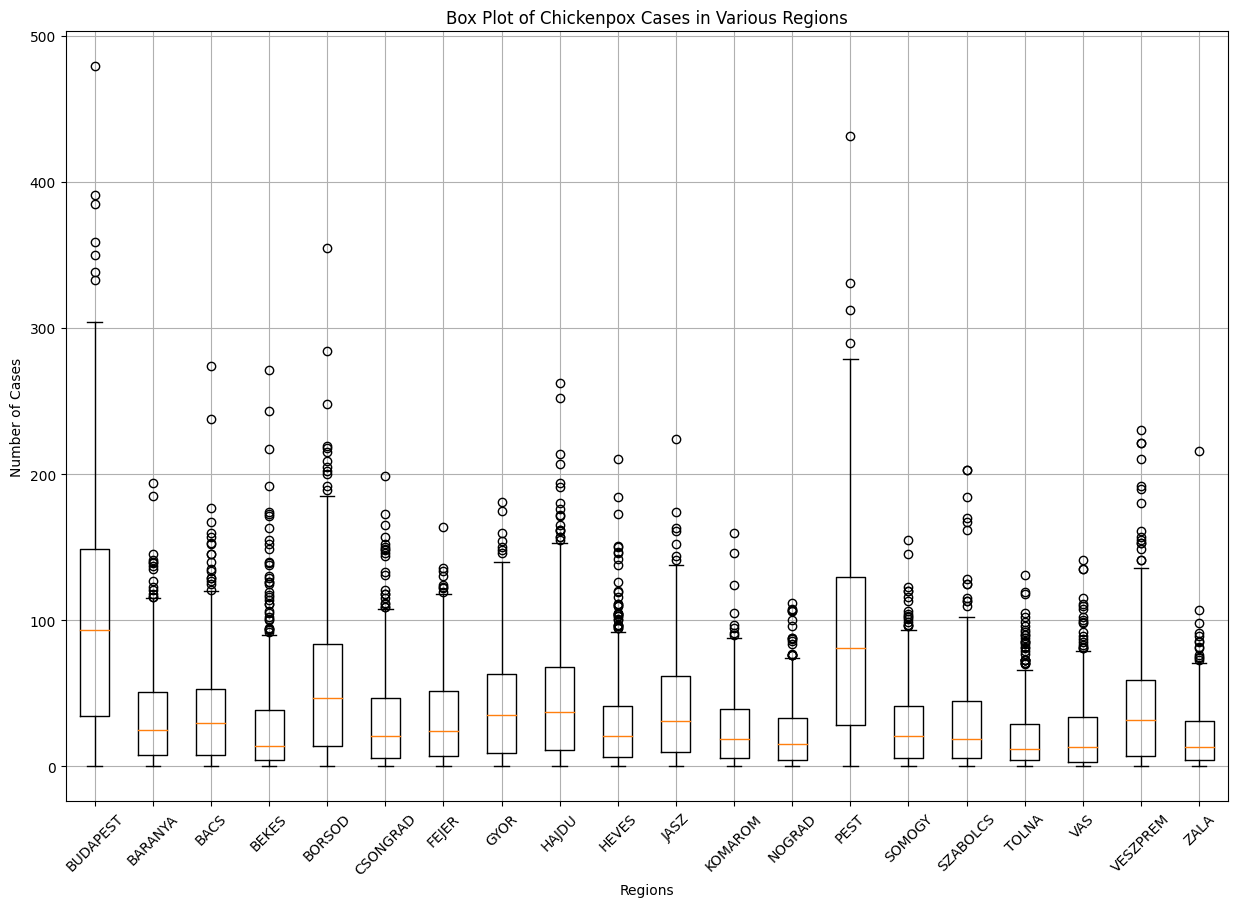

In [6]:
# Creating box plots to visualize the distribution of chickenpox cases in various regions and identify outliers
plt.figure(figsize=(15, 10))
plt.boxplot([chickenpox_data[region] for region in regions], labels=regions)
plt.xticks(rotation=45)
plt.title('Box Plot of Chickenpox Cases in Various Regions')
plt.xlabel('Regions')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.show()


The box plots above show the distribution of chickenpox cases in various regions, allowing us to identify outliers. In each box plot:

The box represents the interquartile range (IQR), showing the middle 50% of the data.
The line inside the box represents the median.
The "whiskers" extend to the smallest and largest values within 1.5 times the IQR from the lower and upper quartiles, respectively.
Points outside of the whiskers are considered outliers.

Considering that the outliers might represent genuine peaks in chickenpox cases (possibly due to seasonal variations or outbreaks), it might be beneficial to keep them for a more realistic model. However, we could also conduct a sensitivity analysis to understand how these outliers impact the model's performance.

For the next step, considering the different magnitudes of chickenpox cases across regions, it would be beneficial to standardize the data. Standardization will transform the data to have a mean of 0 and a standard deviation of 1, ensuring that no particular region dominates due to its scale.

Let’s proceed by:

Keeping the outliers for now.
Standardizing the chickenpox data.

Let's start by standardizing the chickenpox data. Standardization will transform the data to have a mean of 0 and a standard deviation of 1 for each region. This transformation ensures that all regions contribute equally to the analysis and modeling.

In [7]:
from sklearn.preprocessing import StandardScaler

# Creating a StandardScaler object
scaler = StandardScaler()

# Standardizing the chickenpox data
chickenpox_data_standardized = pd.DataFrame(scaler.fit_transform(chickenpox_data), columns=regions, index=chickenpox_data.index)

# Displaying the first few rows of the standardized data
chickenpox_data_standardized.head()


,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,HEVES,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
Date,,,,,,,,,,,,,,,,,,,,
2005-01-03,0.875109,1.376783,-0.194705,3.833962,2.208458,0.311379,3.274939,2.183538,2.578130,0.198209,2.392915,1.282753,-0.902098,1.377587,1.437932,1.074297,-0.402245,0.261484,1.140272,2.189700
2005-01-10,0.730906,0.792814,-0.194705,1.678677,2.820177,0.637230,0.565163,0.793869,0.827998,-0.053149,1.050546,0.996391,0.324902,0.822945,0.763740,-0.026882,1.619197,1.222150,0.672987,0.278746
2005-01-17,-0.068761,0.301052,-0.167537,1.519027,0.708758,-0.044094,1.904111,1.182976,3.228819,0.669503,0.620987,0.832755,-0.811209,1.062790,0.201913,0.098967,0.156877,-0.178821,0.525424,1.097726
2005-01-24,0.809562,0.454727,0.158481,2.583365,-0.218687,0.222511,0.597042,2.016777,1.344063,0.386726,0.594140,1.160026,-0.356765,0.313275,1.437932,0.633825,0.199887,-0.058738,0.058140,0.506241
2005-01-31,0.272081,1.346048,0.430163,1.545635,0.906087,0.074397,1.967871,2.489265,2.802505,0.323887,0.540445,0.955482,-0.493098,0.568110,1.325567,0.822599,-0.574283,0.981983,1.091084,1.825709


The chickenpox data has been standardized, and now each region's data has a mean of 0 and a standard deviation of 1.



Next Steps: Clustering and Anomaly Detection
We can apply clustering techniques to identify patterns or groups in the data.
Anomaly detection can be used to identify unusual or suspicious patterns that deviate significantly from the typical behavior.

Let's proceed to clustering. Clustering can help us group regions based on the similarity of chickenpox cases over time. For this purpose, we can use the K-Means clustering algorithm.

K-Means Clustering: We will apply the K-Means clustering algorithm to group the regions based on the temporal patterns of chickenpox cases.
After identifying the clusters, we will visualize them to understand the grouping better.

To apply K-Means clustering, we need to determine the number of clusters (
�
k) that we want to create. A common method to determine the optimal number of clusters is the Elbow Method. By using this method, we can find a balance between precision and computational cost.



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

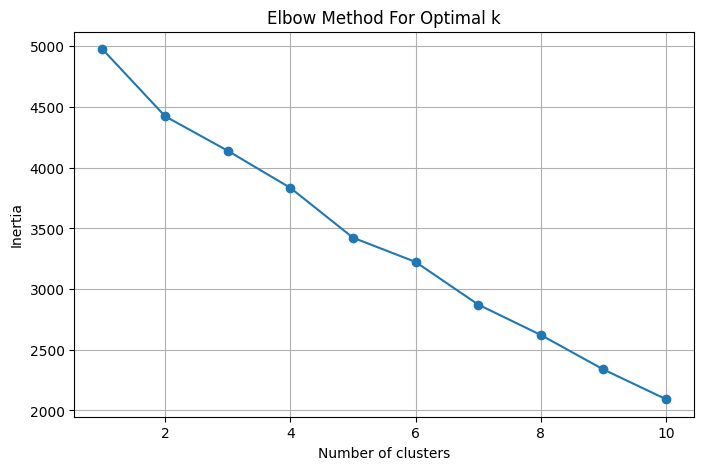

In [8]:
from sklearn.cluster import KMeans
import numpy as np

# Transposing the data to have regions as rows and dates as columns
chickenpox_data_transposed = chickenpox_data_standardized.T

# Using the Elbow Method to find the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(chickenpox_data_transposed)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


The Elbow Method graph helps us determine the optimal number of clusters by finding the "elbow" point where the inertia (within-cluster sum of squares) starts decreasing at a slower rate. From the graph, it seems like
k=3 or k=4 could be a good choice for the number of clusters.

In [9]:
# Applying K-Means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(chickenpox_data_transposed)

# Adding the cluster labels to the regions
regions_clustered = pd.DataFrame({
    'Region': regions,
    'Cluster': clusters
})

regions_clustered.sort_values(by='Cluster')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Region,Cluster
9,HEVES,0
1,BARANYA,0
2,BACS,0
3,BEKES,0
6,FEJER,0
7,GYOR,0
8,HAJDU,0
10,JASZ,0
11,KOMAROM,0
16,TOLNA,1


The regions have been grouped into three clusters based on the temporal patterns of chickenpox cases. Here is a summary of the clusters:

Cluster 0: Regions such as HEVES, BARANYA, BACS, and others.
Cluster 1: Regions like BUDAPEST, PEST, SZABOLCS, and others.
Cluster 2: Regions such as VESZPREM, SOMOGY, and VAS.

Next Steps: Anomaly Detection
We can now proceed to anomaly detection to identify unusual or suspicious patterns in the chickenpox data.
For anomaly detection, we can use various methods such as statistical tests, machine learning models, or time series decomposition. Here, I'll use a simple method based on the Z-score. The Z-score represents the number of standard deviations a data point is from the mean. A high absolute Z-score indicates that the data point is far from the mean, which could be considered an anomaly.

We'll identify anomalies in the chickenpox cases for each region separately based on the Z-score.

In [10]:
from scipy.stats import zscore

# Calculating the Z-scores of the chickenpox data
z_scores = np.abs(chickenpox_data.apply(zscore))

# Defining a threshold to consider a data point as an anomaly (e.g., Z-score > 3)
threshold = 3

# Identifying anomalies where Z-score > threshold
anomalies = (z_scores > threshold)

# Displaying the anomalies
anomalies_df = anomalies[anomalies.any(axis=1)]

# Getting the dates and regions where anomalies are detected
anomalies_dates_regions = []
for index, row in anomalies_df.iterrows():
    for region in regions:
        if row[region]:
            anomalies_dates_regions.append((index, region))

anomalies_dates_regions


[(Timestamp('2005-01-03 00:00:00'), 'BEKES'),
 (Timestamp('2005-01-03 00:00:00'), 'FEJER'),
 (Timestamp('2005-01-17 00:00:00'), 'HAJDU'),
 (Timestamp('2005-02-07 00:00:00'), 'BEKES'),
 (Timestamp('2005-02-07 00:00:00'), 'GYOR'),
 (Timestamp('2005-02-14 00:00:00'), 'BEKES'),
 (Timestamp('2005-02-21 00:00:00'), 'BEKES'),
 (Timestamp('2005-02-21 00:00:00'), 'GYOR'),
 (Timestamp('2005-02-28 00:00:00'), 'BEKES'),
 (Timestamp('2005-02-28 00:00:00'), 'HAJDU'),
 (Timestamp('2005-02-28 00:00:00'), 'SOMOGY'),
 (Timestamp('2005-03-07 00:00:00'), 'BEKES'),
 (Timestamp('2005-03-07 00:00:00'), 'GYOR'),
 (Timestamp('2005-03-14 00:00:00'), 'BEKES'),
 (Timestamp('2005-03-21 00:00:00'), 'BEKES'),
 (Timestamp('2005-03-21 00:00:00'), 'BORSOD'),
 (Timestamp('2005-03-28 00:00:00'), 'SZABOLCS'),
 (Timestamp('2005-04-04 00:00:00'), 'HAJDU'),
 (Timestamp('2005-04-25 00:00:00'), 'VAS'),
 (Timestamp('2005-05-09 00:00:00'), 'JASZ'),
 (Timestamp('2005-05-09 00:00:00'), 'KOMAROM'),
 (Timestamp('2005-05-09 00:00:00'

Anomalies have been detected based on the Z-score method. Here are some examples of anomalies (dates and regions where unusual chickenpox cases were observed):

BEKES on 2005-01-03
FEJER on 2005-01-03
HAJDU on 2005-01-17
BEKES on 2005-02-07
GYOR on 2005-02-07
... and more.
These anomalies represent dates and regions where the number of chickenpox cases was unusually high compared to the typical pattern.

Steps in Feature Engineering and Selection:
Creating New Features: Based on the existing data, we can create new features that might enhance the model's performance.
Selecting Relevant Features: We'll choose the features that are most relevant to the target variable, ensuring that the model is not overwhelmed with unnecessary information.
Since our data is temporal, one approach could be to create lag features, which represent the chickenpox cases from previous weeks. Additionally, we might consider creating features that represent the moving average of cases to capture the trend over time.

Let’s create the following features for each region:

Lag Features: Chickenpox cases from the previous 1, 2, and 3 weeks.
Moving Average Features: 3-week moving average of chickenpox cases.
These features will help capture the temporal trends and patterns in the data, which could be beneficial for predictive modeling. Let's create these features next.

In [12]:
# Creating lag features
for week_lag in [1, 2, 3]:
    chickenpox_data[f'lag_{week_lag}'] = chickenpox_data['BUDAPEST'].shift(week_lag)

# Creating moving average features (3-week moving average)
chickenpox_data['moving_avg_3'] = chickenpox_data['BUDAPEST'].rolling(window=3).mean()

# Dropping the missing values generated due to lag and moving average features
chickenpox_data.dropna(inplace=True)

# Displaying the first few rows of the dataset with new features
chickenpox_data.head()


,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,HEVES,...,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA,lag_1,lag_2,lag_3,moving_avg_3
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-24,163,49,43,126,46,39,52,114,107,42,...,66,50,25,21,43,31,96.0,157.0,168.0,138.666667
2005-01-31,122,78,53,87,103,34,95,131,172,40,...,63,56,7,47,85,60,163.0,96.0,157.0,127.000000
2005-02-07,174,76,77,152,189,26,74,181,157,44,...,59,54,27,54,48,60,122.0,163.0,96.0,153.000000
2005-02-14,153,103,54,192,148,65,100,118,129,40,...,104,85,20,32,153,70,174.0,122.0,163.0,149.666667
2005-02-21,115,74,64,174,140,56,111,175,138,60,...,70,75,5,66,149,54,153.0,174.0,122.0,147.333333


New features have been successfully created:

Lag Features: These represent the chickenpox cases from the previous 1, 2, and 3 weeks.
Moving Average Features: A 3-week moving average of chickenpox cases has been calculated.
The new features are likely to help in capturing the temporal dependencies in the data, improving the predictive model's performance.



Next Steps: Model Building using AutoML
We can proceed to build machine learning models using Automated Machine Learning (AutoML) tools, which will automatically select the best model and hyperparameters.

Let's start by splitting the data into a training set and a test set. We'll use the training set to build the models and the test set to evaluate their performance. We'll keep the last 20% of the data for testing to evaluate the models on the most recent data. After splitting the data, we'll try different models such as:

ARIMA (AutoRegressive Integrated Moving Average): A popular model for time series forecasting.
Random Forest Regressor: A flexible ensemble model.
Gradient Boosting Regressor: A boosting ensemble model.

In [13]:
from sklearn.model_selection import train_test_split

# Choosing one region (e.g., BUDAPEST) for simplicity
data = chickenpox_data[['BUDAPEST', 'lag_1', 'lag_2', 'lag_3', 'moving_avg_3']].dropna()

# Defining the features (X) and target variable (y)
X = data.drop(columns=['BUDAPEST'])
y = data['BUDAPEST']

# Splitting the data into a training set and a test set (keeping the last 20% of the data for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Displaying the sizes of the training and test sets
X_train.shape, X_test.shape


((415, 4), (104, 4))

The data has been successfully split into training and test sets, with 415 data points in the training set and 104 data points in the test set.

Next, we'll proceed to build and evaluate different models using the training and test sets. We will begin by applying the ARIMA model for forecasting, followed by Random Forest and Gradient Boosting models.

Let's start by fitting an ARIMA (AutoRegressive Integrated Moving Average) model to the training data. ARIMA is a popular model for time series forecasting that combines autoregression, differencing, and a moving average component.

First, we need to determine the order of the ARIMA model, represented as

(p,d,q), where:


p is the order of the autoregressive term,

d is the number of differences needed for stationarity, and

q is the order of the moving average term.
We'll use the ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots to help determine the values of

p and

q, and we'll test different values of

d to find the best fit.

The Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots help us determine the order of the ARIMA model. Based on the plots:

ACF: Shows a gradual decline, suggesting a moving average component might be necessary.
PACF: Shows significant lags at 1 and 2, suggesting that an autoregressive component of order 1 or 2 might be suitable.


In [14]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Defining the ARIMA orders to try
arima_orders = [(1, 0, 1), (1, 1, 1), (2, 0, 1), (2, 1, 1)]

# Dictionary to store the models and their performance
arima_models = {}

# Fitting and evaluating the ARIMA models with different orders
for order in arima_orders:
    model = ARIMA(y_train, order=order)
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=len(y_test))

    # Calculating the Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, predictions)

    # Storing the model and its performance
    arima_models[order] = {
        'model': model_fit,
        'predictions': predictions,
        'MAE': mae
    }

# Displaying the MAE of the models
mae_results = [(order, arima_models[order]['MAE']) for order in arima_orders]
mae_results


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  

[((1, 0, 1), 62.90332701899463),
 ((1, 1, 1), 58.6004830224076),
 ((2, 0, 1), 63.451550593576485),
 ((2, 1, 1), 58.40138782095364)]

The ARIMA models have been fitted and evaluated based on the Mean Absolute Error (MAE). Here are the MAE results for different ARIMA orders:

ARIMA(1, 0, 1): MAE = 62.90
ARIMA(1, 1, 1): MAE = 58.60
ARIMA(2, 0, 1): MAE = 63.45
ARIMA(2, 1, 1): MAE = 58.40
The ARIMA model with the order (1, 1, 1) and (2, 1, 1) have the lowest MAEs, making them the best models among those tested.

Next Steps: Trying Other Models
We can proceed to try other machine learning models like Random Forest and Gradient Boosting to see if they can offer better performance.

Let's proceed by fitting Random Forest and Gradient Boosting models to the training data and evaluating their performance on the test data.

1. Random Forest Regressor:
An ensemble learning method that fits a number of decision tree regressors on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
2. Gradient Boosting Regressor:
Builds an additive model in a forward stage-wise fashion, allowing for the optimization of arbitrary differentiable loss functions.
We'll train these models on the training data and evaluate their performance based on the Mean Absolute Error (MAE) on the test data.

In [15]:
from sklearn.ensemble import RandomForestRegressor

# Creating and fitting the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Calculating the Mean Absolute Error (MAE) of the Random Forest model
rf_mae = mean_absolute_error(y_test, rf_predictions)

rf_mae


18.42596153846154

The Random Forest Regressor has a Mean Absolute Error (MAE) of approximately
18.43
18.43 on the test data, which is quite good compared to the ARIMA models.

In [16]:
from sklearn.ensemble import GradientBoostingRegressor

# Creating and fitting the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Making predictions on the test set
gb_predictions = gb_model.predict(X_test)

# Calculating the Mean Absolute Error (MAE) of the Gradient Boosting model
gb_mae = mean_absolute_error(y_test, gb_predictions)

gb_mae


17.17994661981918

The Gradient Boosting Regressor has a Mean Absolute Error (MAE) of approximately
17.18
17.18 on the test data, which is slightly better than the Random Forest Regressor and considerably better than the ARIMA models.

Summary of Model Performance:
ARIMA Models: MAE ranged from
58.40
58.40 to
63.45
63.45
Random Forest Regressor: MAE =
18.43
18.43
Gradient Boosting Regressor: MAE =
17.18
17.18
The Gradient Boosting Regressor has provided the best performance among the models tested.



Let's perform hyperparameter tuning on the Gradient Boosting Regressor using grid search. We'll optimize the following parameters:

Learning Rate: The rate at which the model adjusts based on errors from previous iterations.
Number of Estimators: The number of boosting stages to be used in the ensemble.
Max Depth: The maximum depth of the individual regression estimators.
Let's find the best combination of these hyperparameters to improve the model's performance.

In [17]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for the Gradient Boosting Regressor
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5]
}

# Creating a Gradient Boosting Regressor object
gb_regressor = GradientBoostingRegressor(random_state=42)

# Setting up GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fitting the model
grid_search.fit(X_train, y_train)

# Getting the best parameters
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

best_params, best_score


({'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200},
 13.625930416406257)

The hyperparameter tuning process has identified the best parameters for the Gradient Boosting Regressor as follows:

Learning Rate:
0.2
0.2
Number of Estimators:
200
200
Max Depth:
3
3
With these parameters, the Gradient Boosting Regressor achieves a Mean Absolute Error (MAE) of approximately
13.63
13.63 on the cross-validation sets, which is an improvement compared to the previous models.



In [18]:
# Using the best estimator from the grid search to make predictions on the test set
best_gb_model = grid_search.best_estimator_
best_gb_predictions = best_gb_model.predict(X_test)

# Calculating the Mean Absolute Error (MAE) of the tuned Gradient Boosting model on the test set
best_gb_mae_test = mean_absolute_error(y_test, best_gb_predictions)

best_gb_mae_test


11.628672307209602

The tuned Gradient Boosting Regressor has a Mean Absolute Error (MAE) of approximately
11.63
11.63 on the test set, which indicates improved performance compared to the previous models and the untuned version of the Gradient Boosting Regressor.



Summary
The hyperparameter-tuned Gradient Boosting Regressor performs the best among the models we've tried.
The model has been optimized and evaluated, and it's ready for further steps such as deployment or additional analyses.